<center><font size=5>第13章 抽象类和接口</font></center>

一个包含抽象方法的类必须声明为抽象类，但抽象类也可以包含非抽象方法

抽象类的构造方法定义为**protected**，因为它只被子类使用

In [15]:
public static Number getLargestNumber(ArrayList<Number> list){
  if ((list == null) || list.size() == 0){
    return null;
}
  Number number = list.get(0);
  for (int i = 0; i < list.size(); i++){
    if (number.doubleValue() < list.get(i).doubleValue()){
      number = list.get(i);
  }
}
  return number;
}

ArrayList<Number> list = new ArrayList<>();
list.add(45);
list.add(3445.53);
list.add(new BigInteger("3432323234344343101"));
list.add(new BigDecimal("2.0909090909890913434333344343"));
System.out.println("The largest number is " + getLargestNumber(list));

The largest number is 3432323234344343101


关于Number类和它的子类Integer中的compareTo方法：

In [2]:
Number x = new Integer(3);
Integer y = new Integer(3);

In [3]:
x.compareTo(new Integer(4));

CompilationException: 

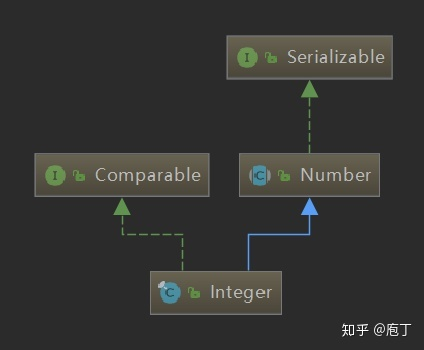

定义一个父类类型的引用指向一个子类的对象既可以使用子类强大的功能，又可以<font color='dd0000'>抽取父类的共性</font>；

所以，父类类型的引用可以调用父类中定义的所有属性和方法，而对于子类中定义而父类中没有的方法，它是无可奈何的；

同时，父类中的一个方法只有在在父类中定义而在子类中没有重写的情况下，才可以被父类类型的引用调用；

对于父类中定义的方法，如果子类中重写了该方法，那么父类类型的引用将会调用子类中的这个方法，这就是动态连接。


In [4]:
Number x = new Integer(3);    // 父类的引用 子类的对象 x不能调用Number类中没有的compareTo方法
((Integer)x).compareTo(new Integer(4));

-1

<center><font size=4>13.5 接口</font></center>

接口是一种与类相似的结构，<font color='dd0000'>只包含常量和抽象方法</font>

接口在许多方面都与抽象类相似，但是它的目的是指明相关或者不相关类的<font color='dd0000'>多个对象的共同行为</font>

可以使用接口作为引用变量的数据类型或类型转换的结果，不能用new创建接口的实例

和常规类一样，每个接口都被编译为独立的字节码文件

类和接口之间的关系称为接口继承，使用```implements```关键字

由于接口中所有的数据域都是 public static final，而且所有的方法都是 public abstract，所以Java允许忽略这些修饰符

In [5]:
public interface T{
    public static final int K = 1;
    public abstract void p();
}

In [6]:
public interface T{
    int K = 1;
    void p();
}

上述两个接口定义等价

<font color='dd0000'>当一个类实现某个接口时，该方法必须被声明为 public，可见性不能省略</font>

<center><font size=4>13.6 Comparable接口</font></center>

Comparable接口定义了```compareTo```方法，用于比较<font color='dd0000'>对象</font>

Comparable接口是一个<font color='dd0000'>泛型接口</font>。在实现该接口时，泛型类型E被替换成一种具体的类型。

如果对象是Comparable接口类型的实例的话，Java API中的```java.util.Arrays.sort(Object[])```方法就可以使用```compareTo```方法来对数组中的对象进行比较和排序

可以在类中定义```compareTo```方法而不实现Comparable接口，但是通过实现接口，可以将对象传递给需要Comparable类型的方法(类似多态)

<center><font size=4>13.7 Cloneable接口</font></center>

Cloneable接口给出了一个可克隆的对象

In [7]:
public interface Cloneable{

}

Cloneable接口是空的，不包含常量和抽象方法，这种带空体的接口称为**标记接口**

标记接口用来表示一个类拥有某些特定的属性

实现Cloneable接口的类被标记为可克隆的，它的对象可以使用在Object类中定义的```clone()```方法克隆

为了定义一个自定义类来实现Cloneable接口，这个类必须覆盖Object类中的```clone()```方法

**Cloneable接口**
三句话总结：

（1）此类实现了Cloneable接口，以指示Object的clone()方法可以合法地对该类实例进行按字段复制

（2）<font color='dd0000'>如果在没有实现Cloneable接口的实例上调用Object的clone()方法，则会导致抛出CloneNotSupporteddException</font>

（3）按照惯例，实现此接口的类应该使用公共方法重写Object的clone()方法，Object的clone()方法是一个受保护的方法

In [16]:
// Object类中定义的Clone()方法头

protected native Object clone() throws CloneNotSupportException;

CompilationException: 

关键字<font color='dd0000'>native</font>表明这个方法不是用Java写的(C)，但它是JVM针对自身平台实现的。

关键字protected限定方法只能在同一个包内或在其子类中访问，因此子类在实现时，必须将可见性修饰符改为 public，这样该方法才能在任何一个包中使用

因为Object类中针对自身平台实现的```clone```方法完成了克隆对象的任务，所以在子类中只需简单调用```super.clone()```即可

**浅克隆和深克隆**

浅克隆（shallow clone）和深克隆（deep clone）反映的是，当对象中还有对象的时候，那么：

1、浅克隆，即很表层的克隆，如果我们要克隆对象，只克隆它自身以及它所包含的所有对象的引用地址

2、深克隆，克隆除自身对象以外的所有对象，包括自身所包含的所有对象实例

所有的基本数据类型，无论是浅克隆还是深克隆，都会进行原值克隆，毕竟它们都不是对象，不是存储在堆中的。

那其实Object的clone()方法，提供的是一种浅克隆的机制，如果想要<font color='dd0000'>实现对对象的深克隆</font>，在不引入第三方jar包的情况下，可以使用两种办法：

**1、先对对象进行序列化，紧接着马上反序列化出**

**2、先调用super.clone()方法克隆出一个新对象来，然后在子类的clone()方法中手动给克隆出来的非基本数据类型（引用类型）赋值，比如ArrayList的clone()方法**

<center><font size=4>13.8 接口与抽象类</font></center>

一个类可以实现多个接口，但是只能继承一个父类

　　 　　　　|　　　变量　　　|　　　构造方法　　　|　　　方法　　　
  :--|:--|:--|:--
  抽象类|无限制|子类通过构造方法链调用构造方法，抽象类不能用new实例化|无限制
  接口|所有的变量必须是public static final|没有构造方法。接口不能用new实例化|所有方法必须是公共的抽象实例方法 

In [1]:
public class NewClass extends BaseClass implements Interface1, ...,InterfaceN{

}

CompilationException: 

接口可以继承其他接口，这样的接口称为子接口

In [18]:
public interface NewInterface extends Interface1, ..., InterfaceN{

}

CompilationException: 

一个实现NewInterface的类必须实现在Interface1, ..., InterfaceN中所有定义的抽象方法

<font color='dd0000'>接口可以定义一种类型。</font>一个接口类型的变量可以引用任何实现该接口的<font color='dd0000'>类</font>的<font color='dd0000'>实例</font>。

如果一个类实现了一个接口，那么这个接口就类似于该类的一个父类

<font color='dd0000'>★ 抽象方法不能用static修饰，有static的方法不能被重写</font>

In [11]:
(int) -4.56

-4

<center><font size=4>13.10 类的设计原则</font></center>

**1. 内聚性**

类应该描述一个单一的实体，而所有的类操作应该在逻辑上相互配合，支持一个一致的目的

**2. 一致性**

遵循标准Java程序设计风格和命名习惯。为类、数据域和方法选区具有信息的没名字。通常的风格是将数据声明置于构造方法之前，并且将构造方法置于方法之前。

<font color='dd0000'>如果不想让用户创建类的对象，可以在类中声明一个私有的构造方法</font>

**3. 封装性**

一个类应该使用private修饰符隐藏其数据，以免用户直接访问它。这使得类易于维护。只有在希望数据域可读/可写的情况下，提供```get```/```set```方法。

 **4. 清晰性**

**5. 完整性**

类是为许多不同用户的使用而设计的。为了能在一个广泛的应用中使用，一个类应该通过属性和方法提供多种方案以适应用户的不同需求。

**6. 实例和静态**

依赖于类的具体实例的变量或方法必须是一个<font color='dd0000'>实例变量或方法</font>。

如果一个变量被类的所有实例所共享，应该将它声明为静态的；如果方法不依赖于某个具体的实例，应该将它声明为静态方法。

应该总是使用类名(而不是引用变量)引用静态变量和方法。

<font color='dd0000'>不要从构造方法中传入参数来初始化**静态**数据域。</font>

**7. 继承与组合**

继承：is-a。例如，```Apple```is a```Fruit```，```Apple```继承自```Fruit```

组合：has-a。例如，```Person```has a```Name```，```Person```与```Name```为组合关系

**8. 抽象类和接口**

接口和抽象类都可以用于为对象指定共同的行为。

比较强的is-a关系，清晰描述了父子关系，应该使用类来建模。

比较弱的is-a关系，应该使用接口建模，表明一个对象拥有某种属性。